Description: Breast cancer is one of the most common cancers among women worldwide in some case Breast cancer is also found in men.

This program mainly focus on etecting breast cancer, based on dataset from
kaggle.

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 62B2-0015

 Directory of C:\Users\DELL\OneDrive\Documents\AI\AI Final Project

04/06/2022  10:49 AM    <DIR>          .
04/06/2022  10:49 AM    <DIR>          ..
04/04/2022  01:09 PM    <DIR>          .ipynb_checkpoints
04/06/2022  10:49 AM           384,861 Breast_Cancer_Detection_Using_Machine_Learning.ipynb
04/03/2022  07:27 PM           125,933 breast-cancer.csv
               2 File(s)        510,794 bytes
               3 Dir(s)  41,943,777,280 bytes free


In [2]:
#install sympy 

!pip install sympy

In [3]:
# Here i am going to import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#here i am going to import cancer dataset
dataset = pd.read_csv('breast-cancer.csv')
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786.0,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359.0,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202.0,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981.0,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001.0,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Above shown is a sample of the first 10 rows of data from

In [5]:
# Here i am going to count the rows and columns in the dataset

dataset.shape

(593, 32)

Above the Number of Rows are 593 and number of Columns are 32.

In [6]:
# Now i am going to count if there are any empty that are (na, NaN, NAN) values in the dataset

dataset.isna().sum()

id                         24
diagnosis                  24
radius_mean                24
texture_mean               24
perimeter_mean             24
area_mean                  24
smoothness_mean            24
compactness_mean           24
concavity_mean             24
concave points_mean        24
symmetry_mean              24
fractal_dimension_mean     24
radius_se                  24
texture_se                 24
perimeter_se               24
area_se                    24
smoothness_se              24
compactness_se             24
concavity_se               24
concave points_se          24
symmetry_se                24
fractal_dimension_se       24
radius_worst               24
texture_worst              24
perimeter_worst            24
area_worst                 24
smoothness_worst           24
compactness_worst          24
concavity_worst            24
concave points_worst       24
symmetry_worst             24
fractal_dimension_worst    24
dtype: int64

In [7]:
# Now i will remove the row with all missing values (NAN, NaN, na)

dataset = dataset.dropna(axis=0)

In [8]:
# Now I am getting the new count of the numbers of rows and columns

dataset.shape

(569, 32)

In [9]:
# now i am going to count the number of 'M' and 'B' cells here 'M is Malignant cancerous' and 'B Benign non-cancerous cells'.

dataset['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

Above, Cancerous Cell are 212 and Non-Cancerous Cell ate 357

C:\Users\DELL\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

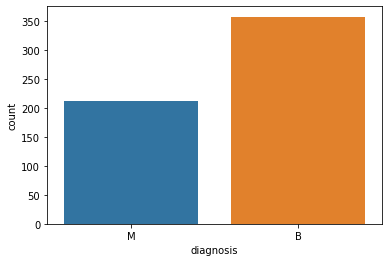

In [10]:
#now iam going to visualize above count

sns.countplot(dataset['diagnosis'], label = "Count")

Above is shown chart displaying Malignant(cancerous) and Benign (non-cancerous) diagnosis.

In [11]:
# Her i am going to look at what data types are used in dataset

dataset.dtypes

id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Above is the list of columns and their data types

In [13]:
# Here i am going to encode the categorical data that means that i am going to  change the values in the colimn
# 'diagnosis' from M and B to 1 and 0 respectively

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset.iloc[:,1] = labelencoder_Y.fit_transform(dataset.iloc[:,1].values)


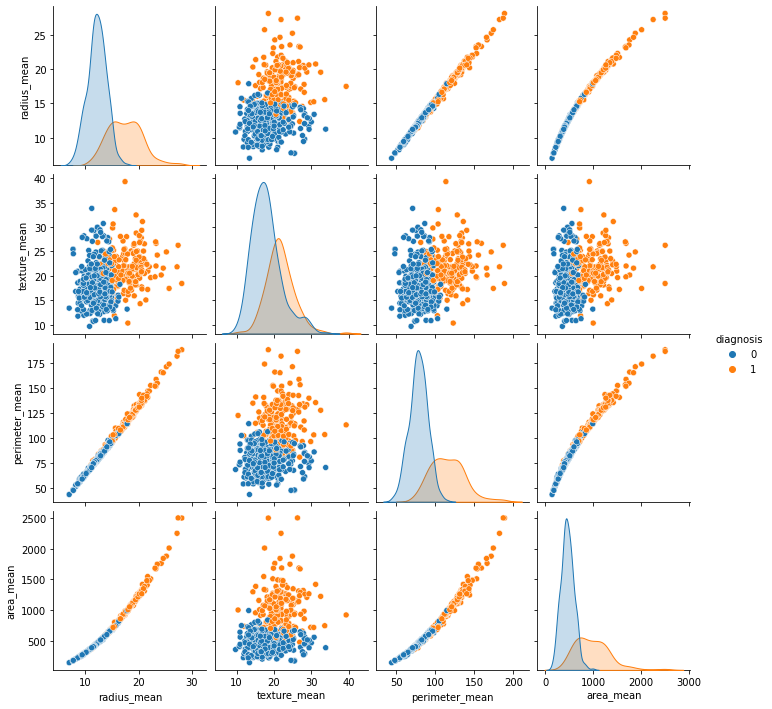

In [14]:
# here i am going to create pair plot
sns.pairplot(dataset.iloc[:,1:6], hue='diagnosis')

Above is pair plot of 6 of the columns highlighting the diagnosis(points in 0 and 1)

In [15]:
# Here now i am going to print the new data set

dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786.0,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359.0,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202.0,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981.0,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001.0,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [16]:
# Now i am going to get tge correlation of the columns i am not going to print first column as it contain id

dataset.iloc[:,1:11].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000


Above is the column correlation

<AxesSubplot:>

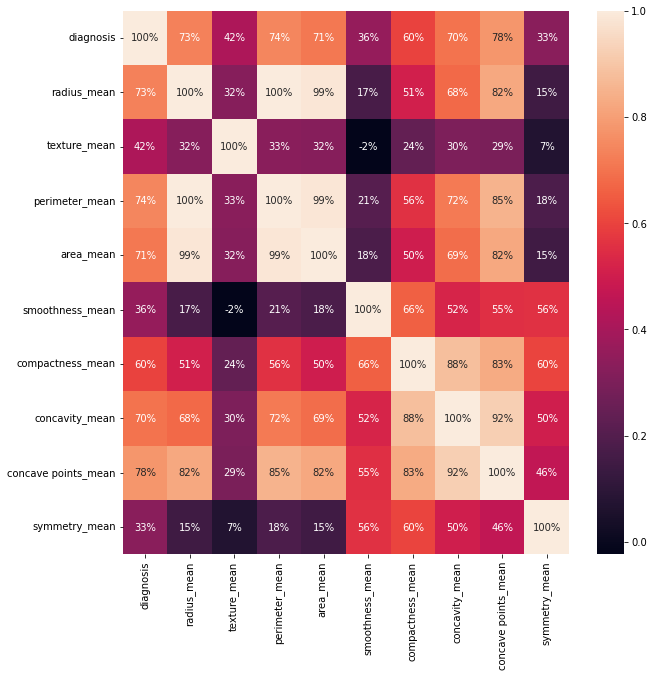

In [17]:
# Here i am going to visualize the correlation shown in above

plt.figure(figsize=(10,10))
sns.heatmap(dataset.iloc[:,1:11].corr(), annot=True, fmt='.0%')

Above is the visualization the correlation by creating heat map

In [18]:
# Now i will split the data set into a feature data that is also known as the independent data set (X), and a target 
# data set that is also known as the dependent data set (Y).

X = dataset.iloc[:,2:31].values
Y = dataset.iloc[:,1].values


Above here Y has the diagnosis that is weather or not the patient has
cancer and X has the features that will help to determine if the patient
has cancer or not

In [19]:
# Here i am going to split the data set into 75% training and 25% tesing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [20]:
# Here i am going to scale the data that is known as Feature Scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now i am going to create a function to hold different models like
1. Logistic Regression
2. Decision Tree Algorithm
3. Random Forest Classification
4. Nearest Neighbor
5. Suport Vector Machines
6. Kernel SVM
7. Naive Bayes

These are the models that will detect that if patient has cancer or not.

In [113]:
# here creating function for models

def models(X_train, Y_train):
    
    #Logistic Regression Algorithm to the training set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #DecisionClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    #RandomForestClassification method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    #SVC method of svm class to use Support Vector Machines Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #GaussianNB method of naive_bayes class to use Naive Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    
    #now i am going to print model accuracy on the training data
    
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    print('[3]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[4]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[5]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[6]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))

    return log, tree, forest, knn, svc_lin, svc_rbf, gauss

In [114]:
# Now i am going to create the model that will contain all of the models

model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9953051643192489
[3]K Nearest Neighbor Training Accuracy: 0.9765258215962441
[4]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[5]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[6]Gaussian Naive Bayes Training Accuracy: 0.9507042253521126


Above is the accuracy of each model on the training data

In [115]:
# Now i am going to test the model accuracy on test data on confusion matrix

from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[86  4]
 [ 4 49]]
Model[0] Testing Accuracy = "0.9440559440559441!"

[[84  6]
 [ 1 52]]
Model[1] Testing Accuracy = "0.951048951048951!"

[[87  3]
 [ 2 51]]
Model[2] Testing Accuracy = "0.965034965034965!"

[[89  1]
 [ 5 48]]
Model[3] Testing Accuracy = "0.958041958041958!"

[[87  3]
 [ 2 51]]
Model[4] Testing Accuracy = "0.965034965034965!"

[[88  2]
 [ 3 50]]
Model[5] Testing Accuracy = "0.965034965034965!"

[[85  5]
 [ 6 47]]
Model[6] Testing Accuracy = "0.9230769230769231!"



Above is the models confusion matrix and accuracy on the test data

In [116]:
# Now i am going to get metrics on the model to see how will wach one performed in other ways

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ',i)
    
    #Here i will check precision, recall, f1-score
    print( classification_report(Y_test, model[i].predict(X_test)) )
    
    #Another way to get the models accuracy on the test data
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print() #Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model  1
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        90
           1       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted

Above is the sample of the models from 1-6 performance metrics on test data

From the accuracy and metrics that are shown above the model that has performed
best on the test data was Random Forest Classifier with an accuracy score of 
about 96.5%.

In [117]:
# Now i am going to print prediction of Random Forest Classifier model

pred = model[2].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


Above shown is, at top decision tree classifier prediction and bottom is the
actual classification of the patients.